In [1]:
import curriculaLDA
from tqdm import tqdm

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/osama.nasir@ebryx.com/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import nltk
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
#%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
#df_tmp = curriculaLDA.loadCurricula()

In [4]:
#df_tmp.to_excel("all_curricula.xlsx", engine='xlsxwriter')
#len(df_tmp)

# Preprocessing Data

In [5]:
df = pd.read_excel('all_curricula.xlsx')
#df = df_tmp

In [6]:
df.head()

,Unnamed: 0,filename,text
0,0,LGST-242-642.pdf,"\n\n \n\n \n\nLGST 242/642 \nBig Data, Big Re..."
1,1,CodeAndPower2017.pdf,LIS 500 \nCODE and POWER\n\nSchool of Library ...
2,2,Time-Machine-syllabus.pdf,UNIV 200-10 Time/Machine - Syllabus\n\nWelcome...
3,3,CMS_332D_Digital_Ethics_Syllabus_Undergr.pdf,CMS 332D Digital Ethics \nUniversity of Texas ...
4,4,i453-syllabus.pdf,School Of Informatics & Computing\n\nInformati...


In [7]:
len(df)

166

In [8]:
corpus, id2word, data_lemmatized = curriculaLDA.preprocessData(df)

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/en_core_web_sm
-->
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [9]:
print(len(corpus))
print(len(id2word))
print(len(data_lemmatized))
#print(data_lemmatized)

166
1515
166


# Maximum coherency model

In [11]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/home/osama.nasir@ebryx.com/Personal/Studies/AI_Ethics/lda/mallet-2.0.8/bin/mallet' # update this path

list_coherence = list()
list_i = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for i in list_i:
    print(i)
    ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=i, id2word=id2word, random_seed=100)

    # Show Topics
    #pprint(ldamallet.show_topics(formatted=False, num_words=15))

    # Compute Coherence Score
    coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
    coherence_ldamallet = coherence_model_ldamallet.get_coherence()
    print(coherence_ldamallet)
    list_coherence.append(coherence_ldamallet)

3
-0.6545358425780218
4
-0.7184227877593048
5
-0.7688089969639508
6
-0.7796012153672612
7
-0.8022017426191966
8
-0.7898388028969082
9
-0.8029802719979441
10
-0.778941420638857
11
-0.8265701358785346
12
-0.8248178393398012


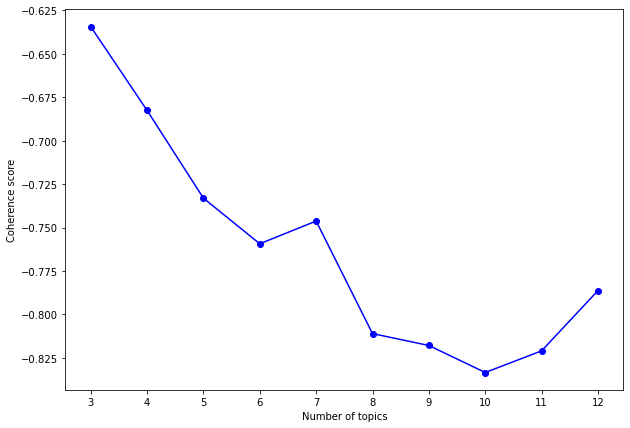

In [34]:
fig = plt.figure(figsize = (10,7))

plt.plot(list_i, list_coherence, '-bo')
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.xticks(list_i)
plt.show()

In [10]:
# Download File: http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
mallet_path = '/home/osama.nasir@ebryx.com/Personal/Studies/AI_Ethics/lda/mallet-2.0.8/bin/mallet' # update this path
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word, random_seed=100)

# Show Topics
pprint(ldamallet.show_topics(formatted=False, num_words=15))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='u_mass')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(0,
  [('medium', 0.05142478462557985),
   ('internet', 0.02491716368455931),
   ('digital', 0.024519549370444003),
   ('society', 0.023724320742213385),
   ('optional', 0.022266401590457258),
   ('culture', 0.016832339297548043),
   ('algorithm', 0.016699801192842943),
   ('public', 0.015109343936381709),
   ('community', 0.014976805831676607),
   ('practice', 0.012723658051689861),
   ('article', 0.012458581842279656),
   ('critical', 0.011928429423459244),
   ('platform', 0.011398277004638835),
   ('chapter', 0.011133200795228629),
   ('surveillance', 0.011000662690523525)]),
 (1,
  [('project', 0.07267119062307217),
   ('presentation', 0.04404688463911166),
   ('lecture', 0.04108574953732264),
   ('read', 0.02270203578038248),
   ('reflection', 0.019000616903146205),
   ('group', 0.018260333127698952),
   ('team', 0.016409623689080815),
   ('report', 0.013818630475015423),
   ('slide', 0.012461443553362123),
   ('section', 0.012214682294879703),
   ('software', 0.01209130166563849

In [11]:
# convert mallet to LDA
t_lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet, gamma_threshold=0.001, iterations=50)

In [12]:

t_lda_model
# The intertopic heatmap
mdiff, annotation = t_lda_model.diff(t_lda_model, distance='jensen_shannon')
mdiff = abs(mdiff-1)

d = pd.DataFrame(mdiff, index=['Media and society', 'Academics 1', 'Academics 2', 'Philosophy', 'Academics 3', 'Responsibility', 'Academics 4', 'Data security', 'Applications', 'Academics 5'], 
             columns=['Media and society', 'Academics 1', 'Academics 2', 'Philosophy', 'Academics 3', 'Responsibility', 'Academics 4', 'Data security', 'Applications', 'Academics 5'])

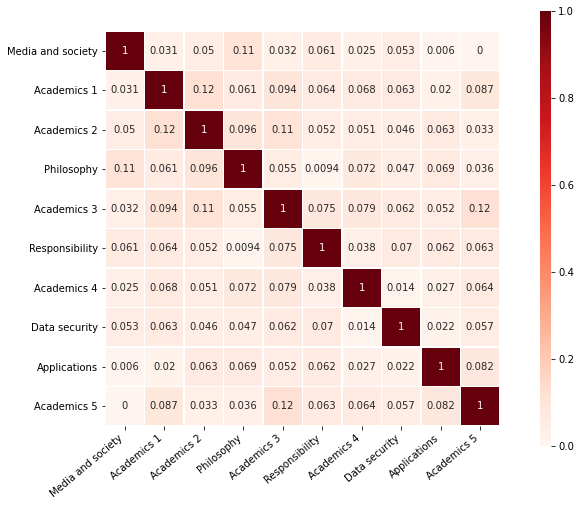

In [13]:
import seaborn as sns
%matplotlib inline

grid_kws = {"width_ratios": (.9, .025), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(8,8), gridspec_kw=grid_kws)

sns.heatmap(d, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})

labels = ['Media and society', 'Academics 1', 'Academics 2', 'Philosophy', 'Academics 3', 'Responsibility', 'Academics 4', 'Data security', 'Applications', 'Academics 5']
ax.set_xticklabels(labels, rotation=40, ha='right')

plt.savefig("intertopic-heatmap.pdf", bbox_inches='tight')

In [11]:
# Show Topics
topics = ldamallet.show_topics(formatted=False, num_words=10)
#topics_s = sorted(topics, key=lambda x: x[1])
for topic in topics:
    keys = []
    for key in topic[1]:
        keys.append(key[0])
    print(keys)

['medium', 'internet', 'digital', 'society', 'optional', 'culture', 'algorithm', 'public', 'community', 'practice']
['project', 'presentation', 'lecture', 'read', 'reflection', 'group', 'team', 'report', 'slide', 'section']
['point', 'code', 'personal', 'review', 'identify', 'retrieve', 'base', 'concept', 'relate', 'professional']
['human', 'philosophy', 'ai', 'moral', 'future', 'machine', 'robot', 'chapter', 'philosophical', 'read']
['program', 'engineering', 'examination', 'offer', 'group', 'assessment', 'credit', 'module', 'apply', 'academic']
['people', 'decision', 'principle', 'build', 'responsibility', 'law', 'explain', 'user', 'framework', 'impact']
['word', 'find', 'day', 'writing', 'answer', 'case', 'text', 'short', 'argument', 'part']
['datum', 'link', 'data', 'law', 'legal', 'detail', 'analysis', 'bias', 'security', 'discrimination']
['ai', 'application', 'search', 'video', 'develop', 'story', 'apply', 'open', 'support', 'language']
['grade', 'material', 'post', 'date', 'par

In [12]:
# Show Topics
topics = ldamallet.show_topics(formatted=False, num_words=15)
#topics_s = sorted(topics, key=lambda x: x[1])
for topic in topics:
    keys = []
    for key in topic[1]:
        keys.append(key[0])
    print(keys)

['medium', 'internet', 'digital', 'society', 'optional', 'culture', 'algorithm', 'public', 'community', 'practice', 'article', 'critical', 'platform', 'chapter', 'surveillance']
['project', 'presentation', 'lecture', 'read', 'reflection', 'group', 'team', 'report', 'slide', 'section', 'software', 'activity', 'part', 'evaluation', 'feedback']
['point', 'code', 'personal', 'review', 'identify', 'retrieve', 'base', 'concept', 'relate', 'professional', 'create', 'conduct', 'address', 'experience', 'website']
['human', 'philosophy', 'ai', 'moral', 'future', 'machine', 'robot', 'chapter', 'philosophical', 'read', 'idea', 'teach', 'movie', 'society', 'discuss']
['program', 'engineering', 'examination', 'offer', 'group', 'assessment', 'credit', 'module', 'apply', 'academic', 'requirement', 'engineer', 'education', 'degree', 'web']
['people', 'decision', 'principle', 'build', 'responsibility', 'law', 'explain', 'user', 'framework', 'impact', 'understand', 'aspect', 'service', 'software', 'cost'

In [16]:
bloom = list()
#remember
bloom.append(['cite', 'define', 'describe', 'draw', 'enumerate', 'identify', 'index', 'indicate', 'label', 'list', 'match', 'meet', 'name', 'outline', 'point', 'quote', 'read', 'recall', 'recite', 'recognize', 'record', 'repeat', 'reproduce', 'review', 'select', 'state', 'study', 'tabulate', 'trace', 'write'])
#understand
bloom.append(['add', 'approximate', 'articulate', 'associate', 'characterize', 'clarify', 'classify', 'compare', 'compute', 'contrast', 'convert', 'defend', 'describe', 'detail', 'differentiate', 'discuss', 'distinguish', 'elaborate', 'estimate', 'example', 'explain', 'express', 'extend', 'extrapolate', 'factor', 'generalize', 'give', 'infer', 'interact', 'interpolate', 'interpret', 'observe', 'paraphrase', 'picture graphically', 'predict', 'review', 'rewrite', 'subtract', 'summarize', 'translate', 'visualize'])
#apply
bloom.append(['acquire', 'adapt', 'allocate', 'alphabetize', 'apply', 'ascertain', 'assign', 'attain', 'avoid', 'back up', 'calculate', 'capture', 'change', 'classify', 'complete', 'compute', 'construct', 'customize', 'demonstrate', 'depreciate', 'derive', 'determine', 'diminish', 'discover', 'draw', 'employ', 'examine', 'exercise', 'explore', 'expose', 'express', 'factor', 'figure', 'graph', 'handle', 'illustrate', 'interconvert', 'investigate', 'manipulate', 'modify', 'operate', 'personalize', 'plot', 'practice', 'predict', 'prepare', 'price', 'process', 'produce', 'project', 'provide', 'relate', 'round off', 'sequence', 'show', 'simulate', 'sketch', 'solve', 'subscribe', 'tabulate', 'transcribe', 'translate', 'use'])
#analyze
bloom.append(['analyze', 'audit', 'blueprint', 'breadboard', 'break down', 'characterize', 'classify', 'compare', 'confirm', 'contrast', 'correlate', 'detect', 'diagnose', 'diagram', 'differentiate', 'discriminate', 'dissect', 'distinguish', 'document', 'ensure', 'examine', 'explain', 'explore', 'figure out', 'file', 'group', 'identify', 'illustrate', 'infer', 'interrupt', 'inventory', 'investigate', 'layout', 'manage', 'maximize', 'minimize', 'optimize', 'order', 'outline', 'point out', 'prioritize', 'proofread', 'query', 'relate', 'select', 'separate', 'subdivide', 'train', 'transform'])
#evaluate
bloom.append(['appraise', 'assess', 'compare', 'conclude', 'contrast', 'counsel', 'criticize', 'critique', 'defend', 'determine', 'discriminate', 'estimate', 'evaluate', 'explain', 'grade', 'hire', 'interpret', 'judge', 'justify', 'measure', 'predict', 'prescribe', 'rank', 'rate', 'recommend', 'release', 'select', 'summarize', 'support', 'test', 'validate', 'verify'])
#create
bloom.append(['abstract', 'animate', 'arrange', 'assemble', 'budget', 'categorize', 'code', 'combine', 'compile', 'compose', 'construct', 'cope', 'correspond', 'create', 'cultivate', 'debug', 'depict', 'design', 'develop', 'devise', 'dictate', 'enhance', 'explain', 'facilitate', 'format', 'formulate', 'generalize', 'generate', 'handle', 'import', 'improve', 'incorporate', 'integrate', 'interface', 'join', 'lecture', 'model', 'modify', 'network', 'organize', 'outline', 'overhaul', 'plan', 'portray', 'prepare', 'prescribe', 'produce', 'program', 'rearrange', 'reconstruct', 'relate', 'reorganize', 'revise', 'rewrite', 'specify', 'summarize'])

In [17]:
bloom_bow = [id2word.doc2bow(text) for text in bloom]

In [22]:
def bloom_percentage(ldamodel=ldamallet, corpus=bloom_bow):
    # Init output
    sent_topics_df = pd.DataFrame()
    bloom_level = ['Remember', 'Understand', 'Apply', 'Analyze', 'Evaluate', 'Create']

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        topic_contr = list()
        topic_contr.append(bloom_level[i])
        for (topic_num, prop_topic) in row:
            #if j == 0:  # => dominant topic
            #wp = ldamodel.show_topic(topic_num)
            #topic_keywords = ", ".join([word for word, prop in wp])
            topic_contr.append(round(prop_topic,4))
        sent_topics_df = sent_topics_df.append(pd.Series(topic_contr), ignore_index=True)
    sent_topics_df.columns = ['Bloom level', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10']

    #Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_bloom = bloom_percentage(ldamodel=ldamallet, corpus=bloom_bow)

# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_bloom

,Bloom level,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,Remember,0.0915,0.1095,0.1569,0.0980,0.0735,0.0899,0.1258,0.0768,0.0866,0.0915
1,Understand,0.0801,0.1111,0.1193,0.1111,0.0735,0.1275,0.1209,0.0980,0.0817,0.0768
2,Apply,0.0982,0.1163,0.0904,0.0995,0.1124,0.1305,0.0956,0.0736,0.0814,0.1021
3,Analyze,0.1003,0.1111,0.0988,0.0833,0.1173,0.1343,0.0988,0.0787,0.1049,0.0725
4,Evaluate,0.0882,0.1013,0.0801,0.0784,0.0850,0.1193,0.1552,0.1046,0.0931,0.0948
5,Create,0.0850,0.1235,0.1235,0.0782,0.0850,0.1385,0.1056,0.0864,0.1070,0.0672


In [23]:
df_bloom.set_index('Bloom level', inplace=True)
df_bloom = df_bloom[::-1]

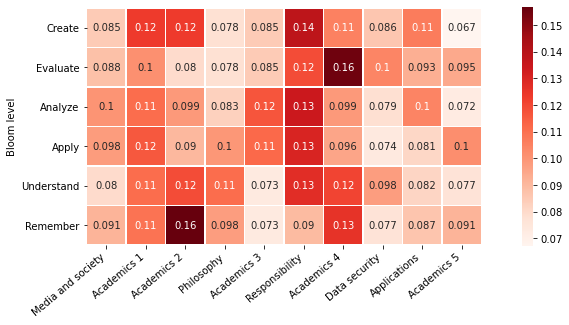

In [24]:
import seaborn as sns
%matplotlib inline

grid_kws = {"width_ratios": (.9, .025), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(8,4.4), gridspec_kw=grid_kws)
7
sns.heatmap(df_bloom, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})

xlabels = ['Media and society', 'Academics 1', 'Academics 2', 'Philosophy', 'Academics 3', 'Responsibility', 'Academics 4', 'Data security', 'Applications', 'Academics 5']
ax.set_xticklabels(xlabels, rotation=40, ha='right')

plt.savefig("bloom_x_topics.pdf", bbox_inches='tight')

In [25]:
df_tech_bloom = df_bloom.copy()
df_tech_bloom.drop('Topic_2', axis = 1, inplace = True)
df_tech_bloom.drop('Topic_3', axis = 1, inplace = True)
df_tech_bloom.drop('Topic_5', axis = 1, inplace = True)
df_tech_bloom.drop('Topic_7', axis = 1, inplace = True)
df_tech_bloom.drop('Topic_10', axis = 1, inplace = True)
df_tech_bloom.head()

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
Bloom level,,,,,
Create,0.0850,0.0782,0.1385,0.0864,0.1070
Evaluate,0.0882,0.0784,0.1193,0.1046,0.0931
Analyze,0.1003,0.0833,0.1343,0.0787,0.1049
Apply,0.0982,0.0995,0.1305,0.0736,0.0814
Understand,0.0801,0.1111,0.1275,0.0980,0.0817


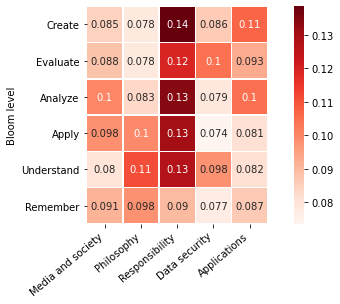

In [26]:
grid_kws = {"width_ratios": (.9, .05), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(4,4), gridspec_kw=grid_kws)
7
sns.heatmap(df_tech_bloom, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})

xlabels = ['Media and society', 'Philosophy', 'Responsibility', 'Data security', 'Applications']
ax.set_xticklabels(xlabels, rotation=40, ha='right')

plt.savefig("bloom_x_tech.pdf", bbox_inches='tight')

In [27]:
df_edu_bloom = df_bloom.copy()
df_edu_bloom.drop('Topic_1', axis = 1, inplace = True)
df_edu_bloom.drop('Topic_4', axis = 1, inplace = True)
df_edu_bloom.drop('Topic_6', axis = 1, inplace = True)
df_edu_bloom.drop('Topic_8', axis = 1, inplace = True)
df_edu_bloom.drop('Topic_9', axis = 1, inplace = True)
df_edu_bloom.head()

,Topic_2,Topic_3,Topic_5,Topic_7,Topic_10
Bloom level,,,,,
Create,0.1235,0.1235,0.0850,0.1056,0.0672
Evaluate,0.1013,0.0801,0.0850,0.1552,0.0948
Analyze,0.1111,0.0988,0.1173,0.0988,0.0725
Apply,0.1163,0.0904,0.1124,0.0956,0.1021
Understand,0.1111,0.1193,0.0735,0.1209,0.0768


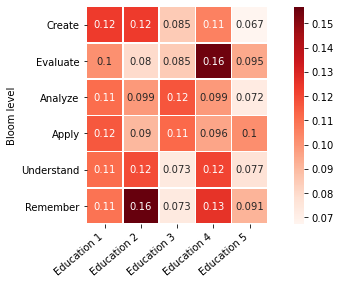

In [28]:
grid_kws = {"width_ratios": (.9, .05), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(4,4), gridspec_kw=grid_kws)
7
sns.heatmap(df_edu_bloom, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})

xlabels = ['Education 1', 'Education 2', 'Education 3', 'Education 4', 'Education 5']
ax.set_xticklabels(xlabels, rotation=40, ha='right')

plt.savefig("bloom_x_edu.pdf", bbox_inches='tight')

In [13]:
def topic_contribution(ldamodel=ldamallet, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        #row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        topic_contr = list()
        topic_contr.append(df['filename'][i])
        for (topic_num, prop_topic) in row:
            #if j == 0:  # => dominant topic
            #wp = ldamodel.show_topic(topic_num)
            #topic_keywords = ", ".join([word for word, prop in wp])
            topic_contr.append(round(prop_topic,4))
        sent_topics_df = sent_topics_df.append(pd.Series(topic_contr), ignore_index=True)
    sent_topics_df.columns = ['FILE NAME', 'Topic_1', 'Topic_2', 'Topic_3', 'Topic_4', 'Topic_5', 'Topic_6', 'Topic_7', 'Topic_8', 'Topic_9', 'Topic_10']

    #Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_contribution = topic_contribution(ldamodel=ldamallet, corpus=corpus, texts=data_lemmatized)

# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_topic_contribution.head(10)

,FILE NAME,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,LGST-242-642.pdf,0.0494,0.0295,0.1050,0.0998,0.0437,0.1719,0.0905,0.2611,0.0471,0.1018
1,CodeAndPower2017.pdf,0.0926,0.0728,0.4270,0.0253,0.0432,0.0564,0.1133,0.0318,0.0807,0.0569
2,Time-Machine-syllabus.pdf,0.0503,0.1614,0.0807,0.0671,0.0768,0.0816,0.0867,0.0211,0.0470,0.3273
3,CMS_332D_Digital_Ethics_Syllabus_Undergr.pdf,0.2552,0.0555,0.0784,0.1126,0.0329,0.0721,0.1196,0.0545,0.0354,0.1838
4,i453-syllabus.pdf,0.1501,0.1027,0.1423,0.0533,0.0556,0.0858,0.1127,0.0351,0.0679,0.1946
5,COMM_360-201_FChee.pdf,0.1187,0.0615,0.0599,0.0386,0.0633,0.0862,0.1510,0.0278,0.0402,0.3528
6,syllabus-info679.pdf,0.0870,0.0396,0.1733,0.0673,0.0602,0.0678,0.1924,0.0431,0.0676,0.2016
7,Proferes - ICT 690 205 Syllabus Spring 2019.pdf,0.0741,0.0191,0.1179,0.0622,0.0590,0.0361,0.1692,0.0325,0.0352,0.3946
8,Template-Syllabus.pdf,0.0209,0.0108,0.0622,0.5003,0.0399,0.0729,0.0679,0.0213,0.0556,0.1481
9,syllabus.pdf,0.0225,0.0546,0.0638,0.0263,0.0929,0.0283,0.0795,0.4465,0.0283,0.1573


In [15]:
df_metadata = pd.read_excel('Curricula_Dataset.xlsx')
df_metadata.head(10)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate"
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate
5,An Introduction to Software Engineering Ethics...,An Introduction to Software Engineering Ethics,NaN,Santa Clara University,United States,North America,HUMN,Philosophy,Undergraduate
6,CS1410.html,Artificial Intelligence,CS 1410,Brown University,United States,North America,CS,Computer Science,Undergraduate
7,"CS122_ Artificial Intelligence - Philosophy, E...","Artificial Intelligence - Philosophy, Ethics, ...",CS 122,Stanford University,United States,North America,CS,Computer Science,Undergraduate
8,Artificial Intelligence & Science Fiction.pdf,Artificial Intelligence & Science Fiction,CS 201W,"Minnesota State University, Mankato",United States,North America,CS,Integrated Engineering (Computer Science),Undergraduate
9,Ethics and Policy Issues in Computing Spring 2...,Ethics and Policy Issues In Computing,08-200,Carnegie Mellon University,United States,North America,CS & HUMN,Engineering and Public Policy,"Undergraduate, Graduate"


In [16]:
merged_inner = pd.merge(left=df_metadata, right=df_topic_contribution, left_on='FILE NAME', right_on='FILE NAME')

In [17]:
merged_inner.head(10)

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,CS,Computer Science,Undergraduate,0.1017,0.1784,0.1142,0.1800,0.0548,0.1025,0.0383,0.1111,0.0563,0.0626
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,HUMN,MIT Media Lab,Graduate,0.1102,0.2390,0.0677,0.0246,0.0124,0.2553,0.0948,0.0355,0.0800,0.0803
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,CS,Computer Science,Undergraduate,0.1425,0.0773,0.0330,0.2917,0.0302,0.1150,0.0389,0.1127,0.1201,0.0385
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,CS,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,0.0687,0.0687,0.0830,0.0217,0.1102,0.0656,0.2308,0.0882,0.0626
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,HUMN,School of Information,Undergraduate,0.1564,0.0391,0.1644,0.0519,0.0339,0.0887,0.0456,0.1225,0.0645,0.2331
5,An Introduction to Software Engineering Ethics...,An Introduction to Software Engineering Ethics,NaN,Santa Clara University,United States,North America,HUMN,Philosophy,Undergraduate,0.0427,0.2926,0.0285,0.0799,0.2070,0.0503,0.1589,0.0234,0.0456,0.0712
6,CS1410.html,Artificial Intelligence,CS 1410,Brown University,United States,North America,CS,Computer Science,Undergraduate,0.0822,0.1589,0.1335,0.0613,0.0722,0.0424,0.0538,0.0623,0.1684,0.1649
7,"CS122_ Artificial Intelligence - Philosophy, E...","Artificial Intelligence - Philosophy, Ethics, ...",CS 122,Stanford University,United States,North America,CS,Computer Science,Undergraduate,0.0774,0.1119,0.0554,0.2312,0.0636,0.0685,0.0748,0.0542,0.1291,0.1339
8,Artificial Intelligence & Science Fiction.pdf,Artificial Intelligence & Science Fiction,CS 201W,"Minnesota State University, Mankato",United States,North America,CS,Integrated Engineering (Computer Science),Undergraduate,0.0450,0.1153,0.0540,0.3019,0.1359,0.1004,0.0799,0.0403,0.0981,0.0293
9,Ethics and Policy Issues in Computing Spring 2...,Ethics and Policy Issues In Computing,08-200,Carnegie Mellon University,United States,North America,CS & HUMN,Engineering and Public Policy,"Undergraduate, Graduate",0.0483,0.1708,0.1061,0.1135,0.0385,0.0598,0.1879,0.0364,0.0696,0.1691


In [18]:
merged_inner.to_excel("LDA_results.xlsx", engine='xlsxwriter', index=False)

# Heatmaps

In [10]:
import seaborn as sns
%matplotlib inline
merged_inner = pd.read_excel('LDA_results.xlsx')

In [11]:
df1 = merged_inner.groupby('COUNTRY').median()
#labels = ['Media and society', 'Education 1', 'Education 2', 'Philosophy', 'Education 3', 'Responsibility', 'Education 4', 'Data security', 'Applications', 'Education 5']
#df1.columns = labels
df1.head(10)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
COUNTRY,,,,,,,,,,
Australia,0.05210,0.10260,0.0786,0.10930,0.1345,0.0513,0.0520,0.07240,0.11540,0.05090
Austria,0.31750,0.05940,0.0580,0.12060,0.0509,0.1137,0.0661,0.15460,0.03960,0.01970
Canada,0.14790,0.07180,0.1048,0.05980,0.1026,0.0648,0.0670,0.05340,0.08700,0.08860
Chile,0.08700,0.08890,0.1167,0.08330,0.1167,0.0907,0.0833,0.12780,0.12220,0.08330
China,0.04080,0.06010,0.0292,0.45630,0.0595,0.0985,0.0445,0.02620,0.15320,0.03160
Denmark,0.04075,0.06435,0.0608,0.12190,0.2196,0.0408,0.0627,0.11340,0.15665,0.11900
England,0.05670,0.05180,0.0426,0.07600,0.0893,0.1164,0.0858,0.05880,0.14790,0.03410
Georgia,0.03440,0.10310,0.0882,0.02750,0.1668,0.0597,0.0666,0.03670,0.05610,0.10870
Germany,0.15950,0.05580,0.0497,0.13820,0.1501,0.0699,0.0687,0.05340,0.16340,0.05830


In [17]:
df_agg = merged_inner.groupby('COUNTRY').count()
df_agg['Topic_1']

COUNTRY
Australia          5
Austria            1
Canada             7
Chile              1
China              1
Denmark            2
England            9
Georgia            3
Germany            3
Hong Kong          2
India              1
Israel             1
Italy              1
Malta              1
Norway             1
Portugal           1
Saudi Arabia       1
Scotland           4
South Korea        2
Spain              2
Sweden             8
United States    109
Name: Topic_1, dtype: int64

In [13]:
df1.drop('Topic_2', axis = 1, inplace = True)
df1.drop('Topic_3', axis = 1, inplace = True)
df1.drop('Topic_5', axis = 1, inplace = True)
df1.drop('Topic_7', axis = 1, inplace = True)
df1.drop('Topic_10', axis = 1, inplace = True)
df1.head()

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
COUNTRY,,,,,
Australia,0.0521,0.1093,0.0513,0.0724,0.1154
Austria,0.3175,0.1206,0.1137,0.1546,0.0396
Canada,0.1479,0.0598,0.0648,0.0534,0.0870
Chile,0.0870,0.0833,0.0907,0.1278,0.1222
China,0.0408,0.4563,0.0985,0.0262,0.1532


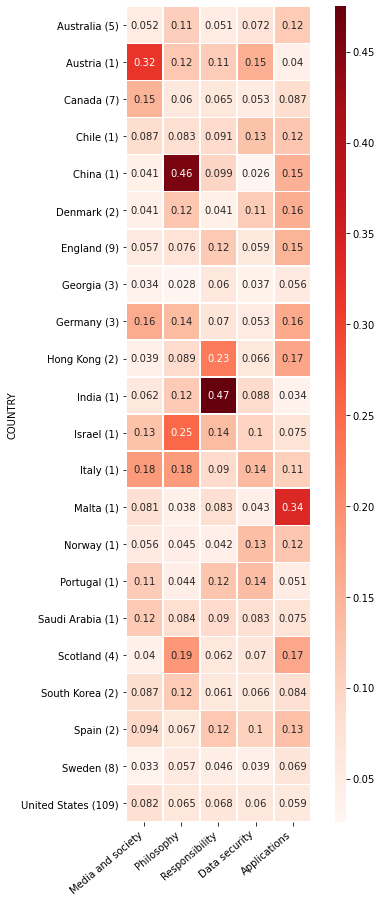

In [60]:
grid_kws = {"width_ratios": (.9, .05), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(4,15), gridspec_kw=grid_kws)

sns.heatmap(df1, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})
xlabels = ['Media and society', 'Philosophy', 'Responsibility', 'Data security', 'Applications']
ylabels = ['Australia (5)' ,'Austria (1)' ,'Canada (7)' ,'Chile (1)' ,'China (1)' ,'Denmark (2)' ,'England (9)' ,'Georgia (3)' ,'Germany (3)' ,'Hong Kong (2)' ,'India (1)' ,'Israel (1)' ,'Italy (1)' ,'Malta (1)' ,'Norway (1)' ,'Portugal (1)' ,'Saudi Arabia (1)' ,'Scotland (4)' ,'South Korea (2)' ,'Spain (2)' ,'Sweden (8)' ,'United States (109)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("country_x_topics.pdf", bbox_inches='tight')

In [61]:
df2 = merged_inner.groupby('CONTINENT').median()
df2 = df2.transpose()
df2.head(10)

CONTINENT,Asia,Asia & Europe,Europe,North America,Ocenia,South America
Topic_1,0.07350,0.0344,0.0543,0.08670,0.0521,0.0870
Topic_2,0.09090,0.1031,0.0519,0.09295,0.1026,0.0889
Topic_3,0.06730,0.0882,0.0550,0.09040,0.0786,0.1167
Topic_4,0.12185,0.0275,0.0799,0.06470,0.1093,0.0833
Topic_5,0.05865,0.1668,0.1763,0.05860,0.1345,0.1167
Topic_6,0.09690,0.0597,0.0699,0.06745,0.0513,0.0907
Topic_7,0.06550,0.0666,0.0694,0.09320,0.0520,0.0833
Topic_8,0.08140,0.0367,0.0552,0.05840,0.0724,0.1278
Topic_9,0.08610,0.0561,0.1279,0.05920,0.1154,0.1222
Topic_10,0.04275,0.1087,0.0561,0.12340,0.0509,0.0833


In [62]:
df2['Asia'] += df2['Asia & Europe']
df2['Europe'] += df2['Asia & Europe']
df2.drop('Asia & Europe', axis = 1, inplace = True)
df2.drop('Ocenia', axis = 1, inplace = True)
df2.drop('South America', axis = 1, inplace = True)
df2.head(10)

CONTINENT,Asia,Europe,North America
Topic_1,0.10790,0.0887,0.08670
Topic_2,0.19400,0.1550,0.09295
Topic_3,0.15550,0.1432,0.09040
Topic_4,0.14935,0.1074,0.06470
Topic_5,0.22545,0.3431,0.05860
Topic_6,0.15660,0.1296,0.06745
Topic_7,0.13210,0.1360,0.09320
Topic_8,0.11810,0.0919,0.05840
Topic_9,0.14220,0.1840,0.05920
Topic_10,0.15145,0.1648,0.12340


In [69]:
df_agg = merged_inner.groupby('CONTINENT').count()
df_agg['Topic_1']

CONTINENT
Asia               8
Asia & Europe      3
Europe            33
North America    116
Ocenia             5
South America      1
Name: Topic_1, dtype: int64

In [71]:
df2 = df2.transpose()
df2.drop('Topic_2', axis = 1, inplace = True)
df2.drop('Topic_3', axis = 1, inplace = True)
df2.drop('Topic_5', axis = 1, inplace = True)
df2.drop('Topic_7', axis = 1, inplace = True)
df2.drop('Topic_10', axis = 1, inplace = True)
df2.head()

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
CONTINENT,,,,,
Asia,0.1079,0.14935,0.15660,0.1181,0.1422
Europe,0.0887,0.10740,0.12960,0.0919,0.1840
North America,0.0867,0.06470,0.06745,0.0584,0.0592


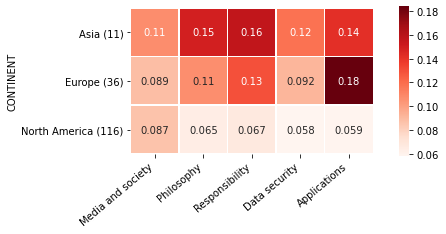

In [86]:
grid_kws = {"width_ratios": (.9, .04), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(5,2.75), gridspec_kw=grid_kws)

sns.heatmap(df2, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})
xlabels = ['Media and society', 'Philosophy', 'Responsibility', 'Data security', 'Applications']
ylabels = ['Asia (11)', 'Europe (36)', 'North America (116)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("continent_x_topics.pdf", bbox_inches='tight')

In [87]:
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS & LAW', ['DISCIPLINE']] = 'Multidisciplinary'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS & HUMN', ['DISCIPLINE']] = 'Multidisciplinary'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'LAW', ['DISCIPLINE']] = 'Law'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'CS', ['DISCIPLINE']] = 'Computer Science'
merged_inner.loc[merged_inner['DISCIPLINE'] == 'HUMN', ['DISCIPLINE']] = 'Humanities'

In [88]:
merged_inner.head()

,FILE NAME,COURSE TITLE,CODE,UNIVERSITY,COUNTRY,CONTINENT,DISCIPLINE,DEPARTMENT,LEVEL,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
0,CMSC 119_ Schedule.html,(De-)Coding the Drone,CMSC 119,Bard College,United States,North America,Computer Science,Computer Science,Undergraduate,0.1017,0.1784,0.1142,0.1800,0.0548,0.1025,0.0383,0.1111,0.0563,0.0626
1,#BlockchainEthics_ The Impact and Ethics of Cr...,The Ethics and Impact of Cryptocurrency and Bl...,NaN,MIT,United States,North America,Humanities,MIT Media Lab,Graduate,0.1102,0.2390,0.0677,0.0246,0.0124,0.2553,0.0948,0.0355,0.0800,0.0803
2,"AI Safety, Ethics, and Policy.txt","AI Safety, Ethics, and Policy",COMS W 3995-001,Columbia University,United States,North America,Computer Science,Computer Science,Undergraduate,0.1425,0.0773,0.0330,0.2917,0.0302,0.1150,0.0389,0.1127,0.1201,0.0385
3,Algorithms and Society.html,Algorithms and Society,EECS 395 and COMMST 395,Northwestern University,United States,North America,Computer Science,Computer Science and Communication Studies,"Undergraduate, Graduate",0.2005,0.0687,0.0687,0.0830,0.0217,0.1102,0.0656,0.2308,0.0882,0.0626
4,Algorithms and Society - University of Michiga...,Algorithms and Society,NaN,University of Michigan,United States,North America,Humanities,School of Information,Undergraduate,0.1564,0.0391,0.1644,0.0519,0.0339,0.0887,0.0456,0.1225,0.0645,0.2331


In [89]:
df3 = merged_inner.groupby('DISCIPLINE').median()
df3.head(10)

,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10
DISCIPLINE,,,,,,,,,,
Computer Science,0.05670,0.1026,0.07860,0.06660,0.07220,0.0801,0.07290,0.07280,0.07260,0.06510
Humanities,0.11050,0.0710,0.07955,0.06470,0.06155,0.0724,0.10885,0.04535,0.06590,0.11685
Law,0.04940,0.0511,0.09760,0.09980,0.06040,0.0859,0.06070,0.26110,0.08580,0.04640
Multidisciplinary,0.05625,0.0530,0.06045,0.10465,0.06285,0.0483,0.07955,0.05145,0.07455,0.10075


In [90]:
df_agg = merged_inner.groupby('DISCIPLINE').count()
df_agg['Topic_1']

DISCIPLINE
Computer Science     71
Humanities           62
Law                   5
Multidisciplinary    28
Name: Topic_1, dtype: int64

In [91]:
df3.drop('Topic_2', axis = 1, inplace = True)
df3.drop('Topic_3', axis = 1, inplace = True)
df3.drop('Topic_5', axis = 1, inplace = True)
df3.drop('Topic_7', axis = 1, inplace = True)
df3.drop('Topic_10', axis = 1, inplace = True)
df3.head()

,Topic_1,Topic_4,Topic_6,Topic_8,Topic_9
DISCIPLINE,,,,,
Computer Science,0.05670,0.06660,0.0801,0.07280,0.07260
Humanities,0.11050,0.06470,0.0724,0.04535,0.06590
Law,0.04940,0.09980,0.0859,0.26110,0.08580
Multidisciplinary,0.05625,0.10465,0.0483,0.05145,0.07455


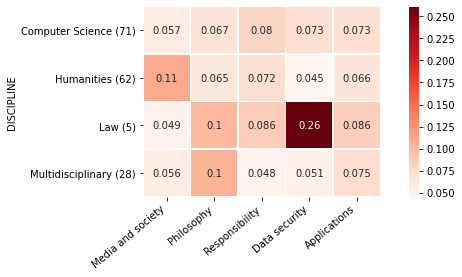

In [98]:
grid_kws = {"width_ratios": (.9, .04), "hspace": .1}
fig, (ax, cbar_ax) = plt.subplots(1,2, figsize=(5,3.5), gridspec_kw=grid_kws)

sns.heatmap(df3, ax=ax, cbar_ax=cbar_ax, square=True, annot=True, linewidths=.5, cmap="Reds", cbar_kws={})
xlabels = ['Media and society', 'Philosophy', 'Responsibility', 'Data security', 'Applications']
ylabels = ['Computer Science (71)', 'Humanities (62)', 'Law (5)', 'Multidisciplinary (28)']

ax.set_xticklabels(xlabels, rotation=40, ha='right')
ax.set_yticklabels(ylabels, rotation=0, ha='right')
plt.savefig("discipline_x_topics.pdf", bbox_inches='tight')

In [22]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

NameError: name 'df_topic_sents_keywords' is not defined

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [15]:
# Visualize the topics
optimal_model = ldamallet
pyLDAvis.enable_notebook()
gmodel = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
vis = pyLDAvis.gensim.prepare(gmodel, corpus, id2word)
vis

/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/home/osama.nasir@ebryx.com/anaconda3/envs/myenv/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.234405 -0.014486       1        1  13.377614
6     -0.032524  0.200684       2        1  10.926471
2      0.047611  0.135175       3        1  10.420802
1     -0.060990  0.083610       4        1   9.969601
5     -0.062133 -0.244070       5        1   9.755446
4     -0.136601  0.053981       6        1   9.446691
0      0.307661 -0.102595       7        1   9.434897
3      0.224538  0.140545       8        1   9.400984
8     -0.082085 -0.011935       9        1   8.699558
7      0.028927 -0.240908      10        1   8.567934, topic_info=              Term        Freq       Total Category  logprob  loglift
357        project  642.000000  642.000000  Default  30.0000  30.0000
120          datum  546.000000  546.000000  Default  29.0000  29.0000
659         medium  430.000000  430.000000  Default  28.0000  28.0000
346   presentation  390.000000  390.000000  Default  27.0000  27.0000
19              ai  481.000000  481.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
477           user   59.356947  140.667508  Topic10  -4.8523   1.5943
418        session   63.836717  167.303104  Topic10  -4.7796   1.4937
227          human   82.875738  364.953774  Topic10  -4.5186   0.9747
1042      resource   67.196544  243.823427  Topic10  -4.7283   1.1683
246       internet   59.356947  292.338791  Topic10  -4.8523   0.8628

[704 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
1         1  0.997209             absence
1047      1  1.021650              absent
783       1  0.629525            academic
783       6  0.369422            academic
784       1  1.000345  academic_integrity
...     ...       ...                 ...
496       9  0.999710             youtube
1505      4  0.953188                zoom
1505      8  0.038128                zoom
781       3  0.984623                ﬁnal
781       5  0.020094                ﬁnal

[1037 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 7, 3, 2, 6, 5, 1, 4, 9, 8])

In [14]:
print(vis.topic_order)

[10, 7, 3, 2, 6, 5, 1, 4, 9, 8]


10


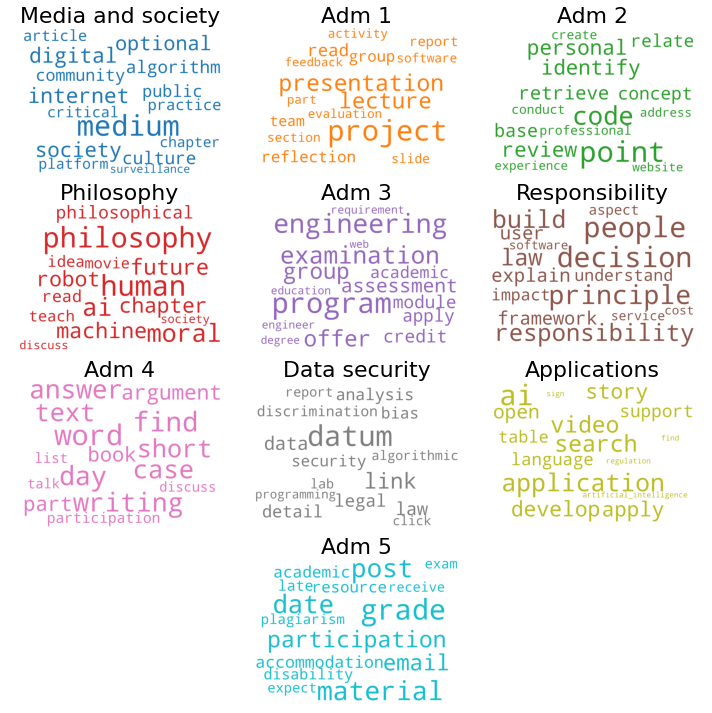

In [14]:
# creating word clouds for topics
from wordcloud import WordCloud, STOPWORDS

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'


cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamallet.show_topics(formatted=False, num_words=15)
print(len(topics))

fig, axes = plt.subplots(4, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i == 9:
        topic_words = dict(topics[9][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=350)
        continue
    if i == 10:
        fig.add_subplot(axes[3,1])
        plt.gca().imshow(cloud)
        plt.gca().set_title('Adm 5', fontdict=dict(size=22))
        break
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=350)
    plt.gca().imshow(cloud)
    if i == 0:
        plt.gca().set_title('Media and society', fontdict=dict(size=22))
    if i == 1:
        plt.gca().set_title('Adm 1', fontdict=dict(size=22))
    if i == 2:
        plt.gca().set_title('Adm 2', fontdict=dict(size=22))
    if i == 3:
        plt.gca().set_title('Philosophy', fontdict=dict(size=22))
    if i == 4:
        plt.gca().set_title('Adm 3', fontdict=dict(size=22))
    if i == 5:
        plt.gca().set_title('Responsibility', fontdict=dict(size=22))        
    if i == 6:
        plt.gca().set_title('Adm 4', fontdict=dict(size=22))
    if i == 7:
        plt.gca().set_title('Data security', fontdict=dict(size=22))
    if i == 8:
        plt.gca().set_title('Applications', fontdict=dict(size=22))
    if i == 11:
        plt.gca().axis('off')
    plt.gca().axis('off')
    

axes[3,0].axis('off')
axes[3,2].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.savefig("wordcloud_corpus.pdf", bbox_inches='tight')
plt.show()

In [ ]:
new_data = []
for i, value in tqdm(enumerate(ldamallet[corpus])):
    row = []
    for item in value:
        if item[1] < 0.1:
            row.append(0)
        else:
            row.append(item[1])
    row.append(df[i:]['filename'].values[0])
    new_data.append(row)
new_df = pd.DataFrame(new_data)
new_df.columns = ['Topic 0', 'Topic 1', 'Topic 2', 'Document']
print(new_df.head())
new_df.to_excel('docs_with_topic.xlsx')

In [ ]:
df[0:]['filename'].values[0]

""

In [ ]:
print(len(new_df[new_df["Topic 0"]==0]))
print(len(new_df[new_df["Topic 1"]==0]))
print(len(new_df[new_df["Topic 2"]==0]))

In [ ]:
print(len(new_df[new_df["Topic 0"]>0.6]))
print(len(new_df[new_df["Topic 1"]>0.6]))
print(len(new_df[new_df["Topic 2"]>0.6]))